In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [58]:
# load the dataset
heart_disease_data = pd.read_csv("/content/cleveland1.csv")

In [59]:
#show the first 5's row from dataset
heart_disease_data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [60]:
#show the dataset info
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [61]:
#show dataset describe
heart_disease_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [62]:
#drop all missing value from dataset
heart_disease_data = heart_disease_data.dropna()

In [63]:
pd.crosstab(heart_disease_data["chest pain type"], heart_disease_data["target"])

target,0,1
chest pain type,,
1,41,25
2,185,31
3,193,90
4,142,483


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

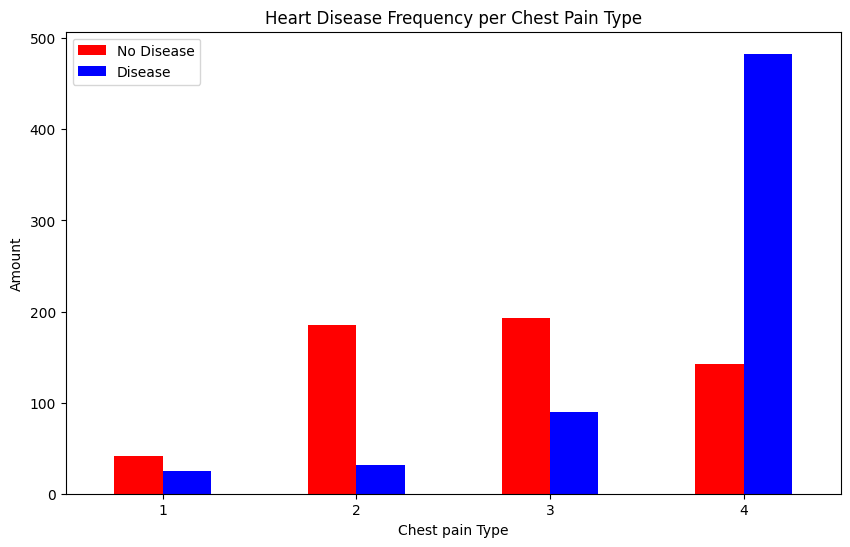

In [64]:
# Make the crosstab more visual
pd.crosstab(heart_disease_data["chest pain type"], heart_disease_data["target"]).plot(kind="bar",figsize=(10, 6),color=["red", "blue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

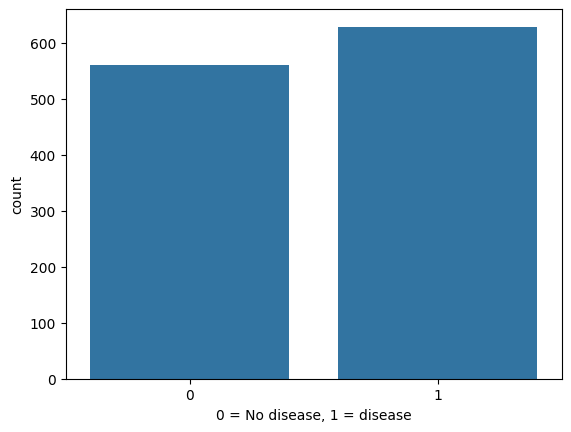

In [65]:
# visualize the dataset
sns.countplot(x='target', data=heart_disease_data)
plt.xlabel("0 = No disease, 1 = disease")
plt.show()

<ipython-input-66-8cbb90e486b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease_data['age'])


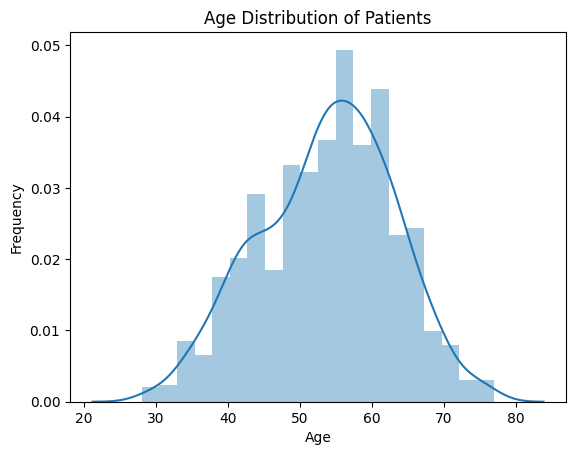

In [66]:
# visualize the distribution of age
sns.distplot(heart_disease_data['age'])
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

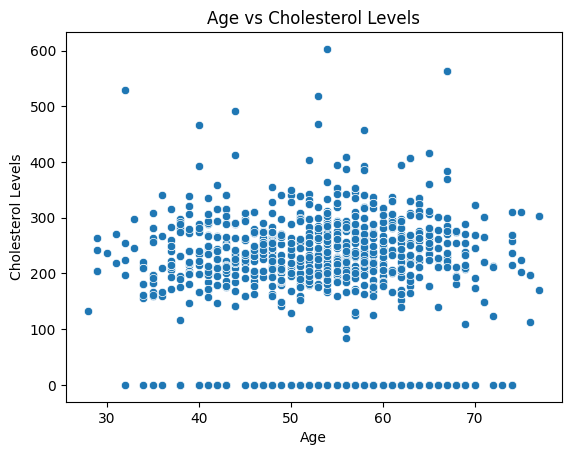

In [67]:
# visualize the relationship between age and cholesterol levels
sns.scatterplot(x='age', y='cholesterol', data=heart_disease_data)
plt.title("Age vs Cholesterol Levels")
plt.xlabel("Age")
plt.ylabel("Cholesterol Levels")
plt.show()

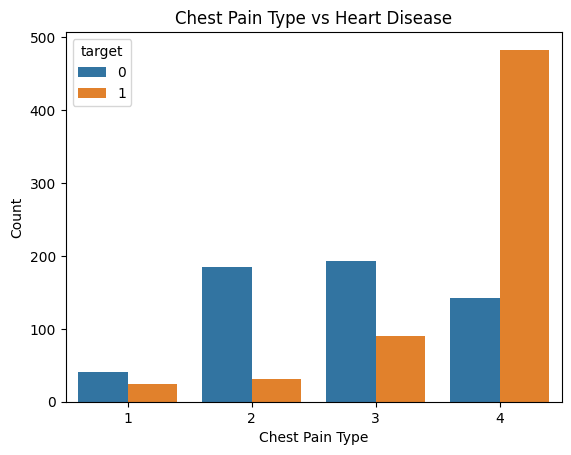

In [68]:
# visualize the relationship between target and chest pain type
sns.countplot(x='chest pain type', hue='target', data=heart_disease_data)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

In [69]:
# create dependent and independent variables
y = heart_disease_data.pop('target')
X = heart_disease_data

In [70]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# instantiating the models
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [72]:
# fitting the models
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# making predictions
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [74]:
print("Cross-Validation Score for Random Forest:", cross_val_score(rfc, X_train, y_train, cv=5).mean())
print("Cross-Validation Score for KNN:", cross_val_score(knn, X_train, y_train, cv=5).mean())

Cross-Validation Score for Random Forest: 0.9001818682832738
Cross-Validation Score for KNN: 0.8392339487462112


In [75]:
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rfc))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       0.87      0.93      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.88      0.88       238
weighted avg       0.89      0.89      0.89       238



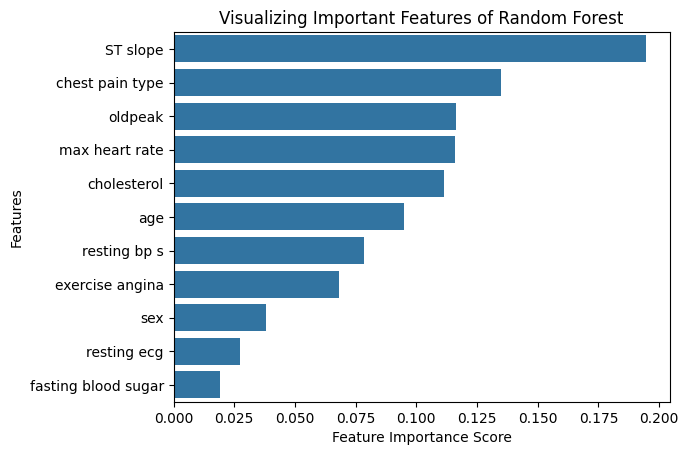

In [76]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance',ascending=False)
sns.barplot(x=feature_importance['importance'], y = feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Random Forest")
plt.show()

In [77]:
# evaluating the model
print("Accuracy for Random Forest :", accuracy_score(y_test, y_pred_rfc)*100)
print("Confusion Matrix for Random Forest :\n", confusion_matrix(y_test, y_pred_rfc))

Accuracy for Random Forest : 94.53781512605042
Confusion Matrix for Random Forest :
 [[ 98   9]
 [  4 127]]


In [78]:
# evaluating the model
print("Accuracy for KNN :", accuracy_score(y_test, y_pred_knn)*100)
print("Confusion Matrix for KNN :\n", confusion_matrix(y_test, y_pred_knn))

Accuracy for KNN : 88.65546218487394
Confusion Matrix for KNN :
 [[ 89  18]
 [  9 122]]
